In [56]:
using Random
using Graphs
using GraphPlot
using DataFrames
using Measures

include("../test_data.jl")
include("../gnm_utils.jl")
include("../gnm.jl")
include("../graph_utils.jl")

Random.seed!(1234)

TaskLocalRNG()

In [54]:
# load synthetic data
W_Y, D, A_init, coord = load_weight_test_data()
A_Y = Float64.(W_Y .> 0);
S_Y = dropdims(sum(weight_conversion(W_Y), dims=1), dims=1)
WC_Y = dropdims(clustering_coef_wu(weight_conversion(W_Y)), dims=2)
WB_Y = betweenness_wei(weight_conversion(W_Y));

In [80]:
# load generate
res_files = filter(file -> endswith(file, ".res"), readdir("/store/DAMTPEGLEN/mw894/data/weighted"))
df_all = DataFrame[]

for (i_res_files, res_file) in enumerate(res_files)
    file = h5open(joinpath("/store/DAMTPEGLEN/mw894/data/weighted", res_file), "r")
    df_file = DataFrame()

    # read meta data
    meta_group = file["meta"]
    params = read_attribute(meta_group, "params")
    file_path = read_attribute(meta_group, "file_name")

    # read data
    K_pcomb = read(file, "K_pcomb")         # models x 4
    K_W_pcomb = read(file, "K_W_pcomb")     # models x 3
    model_order = read(file, "model_order") # models x 1

    # make df
    df_file.model_id = model_order
    df_file.file_name = repeat([file_path], length(model_order))

    df_file.KS_K = K_pcomb[:, 1]
    df_file.KS_C = K_pcomb[:, 2]
    df_file.KS_B = K_pcomb[:, 3]
    df_file.KS_E = K_pcomb[:, 4]

    df_file.KS_S = K_W_pcomb[:, 1]
    df_file.KS_WC = K_W_pcomb[:, 2]
    df_file.KS_WB = K_W_pcomb[:, 3]    
end

ArgumentError: ArgumentError: New columns must have the same length as old columns

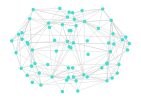

In [60]:
plots = []
for evaluation_measurment in [S_Y, WC_Y, WB_Y]
    mycdf = ecdf(evaluation_measurment)
    x = sort(unique(evaluation_measurment))
    y = mycdf(x)
    p = plot(x, y, 
            linewidth=3, 
            label="CDF", 
            xlabel="Values", 
            ylabel="Cumulative Probability", 
            title="Cumulative Distribution Function")
    push!(plots, p)
end

p = plot(
    plots..., 
    layout=(2, 2), 
    size=(1500, 1500), 
    fmt=:pdf, 
    title=reshape(["Strength", "Weighted clustering", "Weighted betweness"], (1, 3)),
    margin=5mm
)

savefig(p, "/home/mw894/diss/gnm/analysis-weighted/cum_dist.pdf")

"/home/mw894/diss/gnm/analysis-weighted/cum_dist.pdf"

g = SimpleGraph(A_Y)
gplot(g, coord[:,1], coord[:,2])

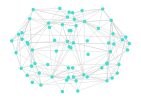

In [66]:
g = SimpleGraph(A_Y)
gplot(g, coord[:,1], coord[:,2])

In [71]:
plots = []
g = SimpleGraph(A_Y)
for evaluation_measurment in [S_Y, WC_Y, WB_Y]
    p = gplot(g, coord[:,1], coord[:,2], nodesize = evaluation_measurment)
    push!(plots, p)
end

plot(
    plots...)

ErrorException: Cannot convert Compose.Context to series data for plotting

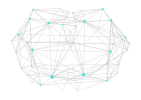

In [81]:
plots[1]

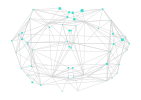

In [82]:
plots[2]

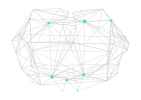

In [83]:
plots[3]